In [1]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# %pylab
# pd.set_option('display.mpl_style', 'default')
# import scipy.integrate
plt.style.use(astropy_mpl_style)

In [2]:
#Need to get rid of 0 points (non readings) and bad readings
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    
    ax1.grid(False)
    ax2.grid(False)
    ax3.grid(False)
    return fig,ax1,ax2,ax3
def StackedPlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                hspace=0.01,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=11,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    
    fig,axarr =plt.subplots(2,1,figsize=(size_x,size_y),sharex=True,sharey=True)
    gs=gridspec.GridSpec(2,1,height_ratios=(9, 1))
    gs.update(hspace=hspace)
    
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax1.set_xticklabels([],c='w')
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xticks([3,4,5,6,7,8])
    ax2.set_yticks([-1,0,1])
#     ax2.
#     ax2.set_xlim
    
#     ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    if Grid:
        axs[0].grid()
        axs[1].grid()
    ax1.grid(False)
    return fig,ax1,ax2

In [3]:
path = os.path.expanduser('~/Documents/FINALM/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 

path2 = os.path.expanduser('~/Documents/')
comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
xy = comp_ew.to_pandas()
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
# Montague
# chestnut1=[]
# sunshine1=[]
# rainbow1=[]
Montague2 = Montague.where(Montague['id'].isin(stuff['id'])).dropna()
Montague2['id'].iloc[0]

7624.0

/tmp/ipykernel_2850536/2244782984.py:179: RuntimeWarning: divide by zero encountered in log10
  Unatten_log=log10(E)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_2850536/2244782984.py:188: RuntimeWarning: invalid value encountered in log10
  if log10(-Res[i])>5:
/tmp/ipykernel_2850536/2244782984.py:188: RuntimeWarning: divide by zero encountered in log10
  if log10(-Res[i])>5:
/tmp/ipykernel_2850536/4268888294.py:56: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, ax

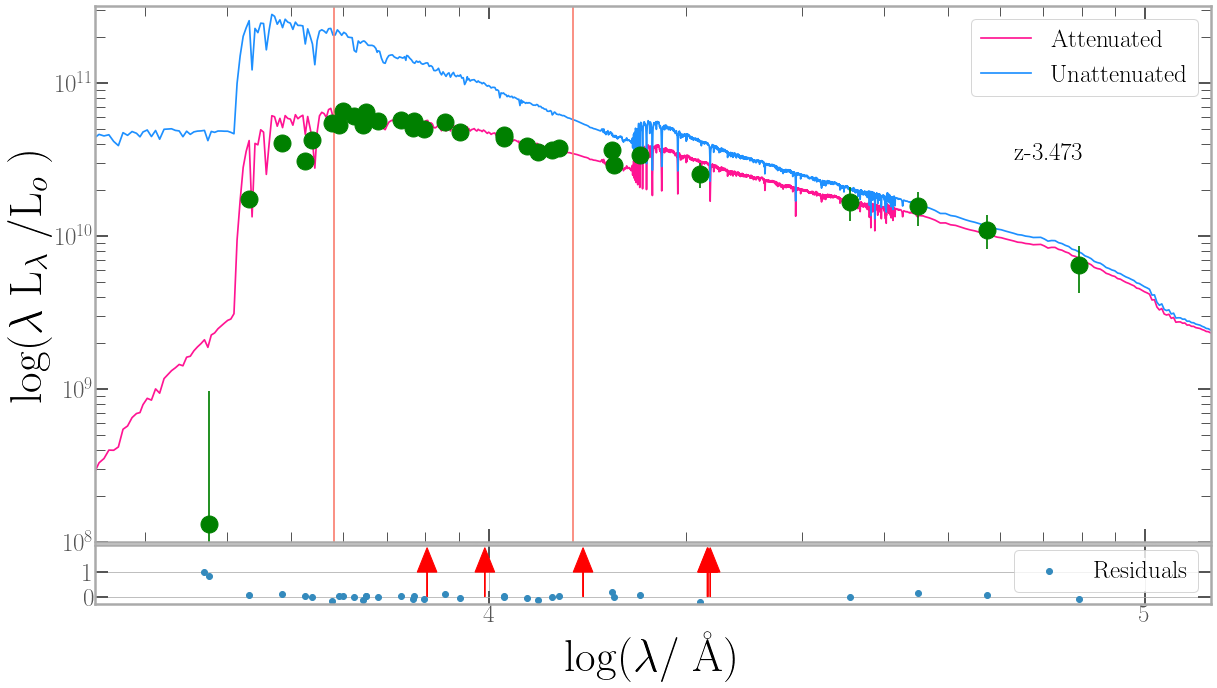

In [5]:
# %%capture
path = os.path.expanduser('~/Documents/FMIGM/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 

path2 = os.path.expanduser('~/Documents/')
comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
xy = comp_ew.to_pandas()
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)

chestnut1=[]
sunshine1=[]
rainbow1=[]
Montague2 = Montague.where(Montague['id'].isin(stuff['id'])).dropna()
for Treesa in range(1):
#     potato=str(int(Montague2['id'].iloc[19]))
    potato=str(7624)#11999
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
    short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
    short2 = pd.DataFrame(columns=['Name'])
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    galaxy_fit3 = pd.DataFrame(columns=[])
    galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])

    chi2 = float(galaxy_fit.index[6].split()[2])
    chestnut1.append(chi2)
    Stellar_mass = float(galaxy_fit.index[8].split()[5])
    sunshine1.append(Stellar_mass)
    StarForm = float(galaxy_fit.index[8].split()[15])
    rainbow1.append(StarForm)
    for i in range(len(short)):
        line = short.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=3:
            continue
        str_line = " ".join(str(item) for item in line)
        short2.loc[i]=str(str_line)

    short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

    short2=short2.drop(['Name'],axis=1)

    SED = Table.from_pandas(short2)
    A=[float(s) for s in SED['A']]
    B=[float(s) for s in SED['B']]
    C=[float(s) for s in SED['C']]
    #SED FILE is in L_lambda/LoA^-1. A is log of the wavelength in angstroms
    
    redshift =float(galaxy_fit.index[6].split()[-1])
    light=2.998*(10**18) #speed of light in Angstroms ~ A/s
    lambda_cA = lambda_c*10000 #central wavelength in Angstroms
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    dist = meters.value
    B = np.array(B)
    A = np.array(A)
    L_lambda = 10**B #L_0/Angstroms
    lambd = 10**A #Angstroms
    L_nu=L_lambda*lambd**2/light #L_0
    f_nu = (L_nu*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
#     f_nu = (L_nu*(3.826*10**26))/(4*pi*dist**2)
    f_nu = f_nu/10**-26
    # print(f_nu)

    C = np.array(C)
    L_lambda2=10**C
    L_nu2=L_lambda2*lambd**2/light
    f_nu2 =(L_nu2*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu2 = f_nu2/10**-26

    f_lambda = light*f_nu/lambd**2
    f_lambda2 = light*f_nu2/lambd**2
    
    
  
    ###################################################
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=40:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
    names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    
    ###################################################
#     errtest=Montague.iloc[Montague.loc[Montague['id']==int(potato)].index[0],3:len(Montague.iloc[0])][::2]
#     flux = Montague.iloc[Montague.loc[Montague['id']==int(potato)].index[0],2:len(Montague.iloc[0])][::2]
#     flux_fit = galaxy_fit2.loc[1].apply(lambda x: float(x))
#     errtest_fit = galaxy_fit2.loc[2].apply(lambda x: float(x))
# #     L_flux=((1+redshift)*flux*3e14)/np.array(lambda_c)                                                                       
#     Lum_vHz = galaxy_fit2.loc[10].apply(lambda x: float(x))
#     flux_v =(Lum_vHz*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
#     flux_v = flux_v/10**-26                                                                       
# #     p=['red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red']
#     for i in range(len(flux_fit)):
#         if np.array(flux_fit[i])<0:
#             flux_v[i]=nan
#             errtest[i]=0
#         if np.array(Lum_vHz[i])<=0:
#             errtest[i]=0
    
#     fig,ax=FancyPlot(r'$\lambda$/\AA',r'F$_{\nu}$/Jy')
#     ax.set_yscale('log')
#     ax.set_xscale('log')
#     ax.set_ylim(bottom=10**-8,top=10**-4)
#     ax.set_xlim(left=10**2.5,right=10**5.5)
#     plt.plot(10**A,10**log10(f_nu)/(1+redshift),label='Attenuated')
#     plt.plot(10**A,10**log10(f_nu2)/(1+redshift),label='Unattenuated')
#     plt.annotate(r'$\chi^2$-'+str(chi2),xy=(10**5,10**-6.5),size=25)
#     plt.annotate('id-'+str(potato),xy=(10**5,10**-6.7),size=25)
#     plt.annotate('z-'+str(redshift),xy=(10**5,10**-6.9),size=25)
#     plt.legend()
# #     plt.scatter(lambda_cA,y=flux*(1+redshift),c=p)
#     plt.errorbar(x=lambda_cA,y=flux,yerr=errtest,fmt='o',c='red',ms=7.5)

# ###################################################################
#     flux_lambda = np.array(flux)*light/lambda_cA**2
#     flux_lambda_err = np.array(errtest)*light/lambda_cA**2
#     flux_v_lambda = np.array(flux_v)*light/lambda_cA**2
#     flux_v_lambda_err = np.array(errtest)*light/lambda_cA**2
#     fig,ax=FancyPlot(r'$\lambda$/\AA',r'F$_{\lambda}$/Jy')
#     ax.set_yscale('log')
#     ax.set_xscale('log')
#     ax.set_ylim(bottom=10**2,top=10**5)
#     ax.set_xlim(left=10**3.5,right=10**5.5)
#     plt.plot(10**A,10**log10(f_lambda/(1+redshift)),label='Attenuated')
#     plt.plot(10**A,10**log10(f_lambda2/(1+redshift)),label='Unattenuated')
#     plt.annotate(potato,xy=(10**4,10**-7))
#     plt.legend()
# #     plt.scatter(lambda_cA,y=flux*(1+redshift),c=p)
#     plt.errorbar(x=lambda_cA,y=flux_lambda,yerr=flux_lambda_err,fmt='o',c='red')
###################################################################

# # Filters

    test=Table.from_pandas(galaxy_fit2)
    L_nu=[float(s) for s in test[0]] #First row.
    L_nu_err=[float(s) for s in test[1]] #Second row
    L_nu=np.array(L_nu) #Luminosity per unit Hz - L_o/s^-1 = L_o*s This is a flux unit but it's not Janskys. 
    L_nu_err=np.array(L_nu_err)

    L_nu_err=L_nu_err#*(1+redshift)
    lL_lambda_err=L_nu_err*light/lambda_cA


    L_lambda=L_nu*light/(lambda_cA)**2 #L_o*s * A/s /A^2 = L_o/A
    lL_lambda=L_lambda*lambda_cA #A *L_o/A =L_o

    arr = np.array(A) #log(A) from SED file
    arr2 = 10**(arr) #Angstroms (A)
    wavelengths = arr2.tolist() #A
    Qlog=log10(wavelengths) #log(A)
    Atten = np.array(B) #log(L_o/A)
    D = (10**Atten)*wavelengths #L_o/A *A = L_o

    D=D.tolist()
    # D = (10**Atten)*Q #L_o/A *A = L_o     #*10000) #Luminosity per unit lambda
    Unatten = np.array(C)
    E = (10**Unatten)*wavelengths  


    E=E.tolist()     #*10000) #^
    Atten_log=log10(D) #log(L_o)
    Unatten_log=log10(E)
    z=log10(lL_lambda) #log(L_o)
    t=log10(lambda_cA) #log(A)


    L_obs =[float(s) for s in test[2]]#Third Row
    L_obs =np.array(L_obs)
    Res = (L_nu - L_obs)/L_nu
    for i in range(len(Res)):
        if log10(-Res[i])>5:
            Res[i]=nan
#     plt.style.use('dark_background')
    fig,ax1,ax2=StackedPlot('',r'log($\lambda$ L$_\lambda$ /L$_o$ )',r'log($\lambda$/ \AA)','')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim(bottom=10**8, top=10**11.5)
    ax1.set_xlim(left=10**3.4,right=10**5.1)
#     ax1.rcParams['font.size'] = '18'
    ax1.plot(10**Qlog,10**Atten_log/(1+redshift),label='Attenuated',c='deeppink')
    ax1.plot(10**Qlog,10**Unatten_log/(1+redshift),label='Unattenuated',c='dodgerblue')
    ax1.legend()
#     ax1.scatter(t,z)#,label='*$\lambda$')
    ax1.errorbar(10**t,10**z,yerr=lL_lambda_err,fmt='o',c='green',ms=17)
    ax1.errorbar(10**t.iloc[33:36],10**z.iloc[33:36], yerr=lL_lambda_err.iloc[33:36],fmt='o',markerfacecolor='gold',markeredgecolor='k',ms=17)
    ax1.axvline(x=(redshift*3000+3000),c='salmon')
    ax1.axvline(x=(redshift*1300+1300),c='salmon')
#     axs[1] = plt.axes([0,0,1,1])

    ax1.annotate('z-'+str(redshift),xy=(10**4.8,10**10.5),size=25)
    ax2.set_xlim(left=3.4,right=5.1)
    
    for i in range(len(Res)):
        if Res[i]>1:
            ax2.arrow(t[i],0,0,1,head_width=0.03, head_length=1, fc='r', ec='r')
        if Res[i]<-1:
            ax2.arrow(t[i],0,0,-1,head_width=0.03, head_length=1, fc='r', ec='r')
    for i in range(len(Res)):
        if abs(Res[i])>1:
            Res[i]=nan
    ax2.scatter(t,Res,label='Residuals')
    ax2.legend()
    plt.savefig(potato+'Luminosity'+'overleaf.pdf',format='pdf', dpi=600, bbox_inches='tight')
###########################################################    


###########################################################
#     for i in range(len(galaxy_fit_s)):
#         line = galaxy_fit_s.index[i].split(" ")
#         while("" in line):
#             line.remove("")
#         if len(line) !=1:
#     #         galaxy_fit3 = galaxy_fit3.reset_index(drop=True)
#             ok=pd.DataFrame(line)
#             galaxy_fit3=pd.concat([galaxy_fit3,ok],axis=1)
#             continue

#         str_line = " ".join(str(item) for item in line)
#         galaxy_fit3.loc[i]=str(str_line)


#     Properties=galaxy_fit3.T
#     Properties.rename(columns={0:'A',1:'B',2:'C',3:'D',4:'E'}, inplace=True)
#     Properties.reset_index(inplace=True,drop=True)
#     for col in Properties.select_dtypes(['object']):
#         Properties[col] = pd.to_numeric(Properties[col].str.rstrip('%'), errors='coerce')

#     fig,ax1,ax2,ax3=HexPlot(r'sSFR /$log(yr^{-1})$',r'Probability',r'Stellar Mass /$log(M_\odot)$','',r'SFR/$log(M_\odot yr^{-1})$',wspace=0.20)
# #     plt.figure(0)
# #     plt.plot(Properties.iloc[0:20]['A'],Properties.iloc[0:20]['B'],label='oops')
# #     plt.scatter(Properties.T[21],Properties.iloc[21],label='oops')
# #     plt.figure(1)
#     ax1.plot(Properties.iloc[232:302]['A'],Properties.iloc[232:302]['B'],label='sSFR')
# #     ax1.hist(Properties.iloc[232:302]['B'],bins=20)
#     damn =max(Properties.iloc[232:302]['B'])
# #     prac =array([damn/4,damn/2,damn,damn/2,damn/4,nan])
#     prac =array([0,damn,damn,damn,0,nan])
# #     ax1.set_xlim(left=8,right=11)
#     ax1.bar(Properties.T[303],prac,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax1.set_xlim(left=Properties.T[303]['A']/1.08,right=Properties.T[303]['E']*1.08)
#     #     plt.figure(2)
# #     ax1.scatter(Percentiles_sSFR,Properties.T[254])
#     ax2.plot(Properties.iloc[305:375]['A'],Properties.iloc[305:375]['B'],label='Stellar Mass')
#     damn2=max(Properties.iloc[305:375]['B'])
# #     prac2=array([damn2/4,damn2/2,damn2,damn2/2,damn2/4,nan])
#     prac2 =array([0,damn2,damn2,damn2,0,nan])
# #     ax2.hist(Properties.iloc[305:375]['B'],bins=20)
#     ax2.bar(Properties.T[376],prac2,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax2.set_xlim(left=Properties.T[376]['A']/1.05,right=Properties.T[376]['E']*1.05)
#     #     ax3.hist(Properties.iloc[603:663]['B'],bins=20)
# #     ax3.scatter(Properties.T[664],crap)
# #     plt.figure(3)
#     ax3.plot(Properties.iloc[735:795]['A'],Properties.iloc[735:795]['B'],label='SFR')
#     damn3=max(Properties.iloc[735:795]['B'])
# #     prac3=array([damn3/4,damn3/2,damn3,damn3/2,damn3/4,nan])
#     prac3 =array([0,damn3,damn3,damn3,0,nan])
#     ax3.bar(Properties.T[796],prac3,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax3.set_xlim(left=Properties.T[796]['A']/1.08,right=Properties.T[796]['E']*1.08)
#     #     plt.figure(4)
# #     plt.savefig(potato+'Stellar Histograms'+'-Highzx',bbox_inches='tight')
#     fig,ax1,ax2,ax3=HexPlot(r'Luminosity /$log(L_\odot)$',r'Probability - Dust',r'Attenuation/$\tau_v^{ISM}$','',r'Mass /$log(M_\odot)$',wspace=0.20)
#     ax1.plot(Properties.iloc[378:448]['A'],Properties.iloc[378:448]['B'],label='Dust Luminosity')
# #     plt.figure(5)
# #     ax1.hist(Properties.iloc[378:448]['B'],bins=20)
#     damn4=max(Properties.iloc[378:448]['B'])
# #     prac4=array([damn4/4,damn4/2,damn4,damn4/2,damn4/4,nan])
#     prac4 =array([0,damn4,damn4,damn4,0,nan])
#     ax1.bar(Properties.T[449],prac4,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax1.set_xlim(left=11,right=13)
#     ax2.plot(Properties.iloc[589:669]['A'],Properties.iloc[589:669]['B'],label='Dust Attenuation')
#     damn5=max(Properties.iloc[589:669]['B'])
# #     prac5=array([damn5/4,damn5/2,damn5,damn5/2,damn5/4,nan])
#     prac5 =array([0,damn5,damn5,damn5,0,nan])
# #     ax2.hist(Properties.iloc[318:329]['B'],bins=20)
#     ax2.bar(Properties.T[670],prac5,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
# #     ax3.hist(Properties.iloc[540:600]['B'],bins=20)
# #     ax3.scatter(Properties.T[601],crap)
# #     plt.figure(6)
#     ax2.set_xlim(left=0,right=1)
#     ax3.plot(Properties.iloc[672:732]['A'],Properties.iloc[672:732]['B'],label='Dust Mass')
#     damn6=max(Properties.iloc[672:732]['B'])
# #     prac6=array([damn6/4,damn6/2,damn6,damn6/2,damn6/4,nan])
#     prac6 =array([0,damn6,damn6,damn6,0,nan])
#     ax3.set_xlim(left=5,right=10)
#     ax3.bar(Properties.T[733],prac6,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.05)
# #     plt.savefig(potato+'Dust Histograms'+'-Highzx',bbox_inches='tight')


In [ ]:
fig,ax=FancyPlot(r'$\lambda (\AA)$',r'Norm F$_{\nu}$')
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylim(bottom=0,top=1.2)
ax.set_xlim(right=25000)
res_J1 = Table.read('~/Desktop/ProSpect_Filters'+'/J1'+'.csv')
res_J2= Table.read('~/Desktop/ProSpect_Filters'+'/J2'+'.csv')
res_J3= Table.read('~/Desktop/ProSpect_Filters'+'/J3'+'.csv')
res_Hs= Table.read('~/Desktop/ProSpect_Filters'+'/Hs'+'.csv')
res_Hl= Table.read('~/Desktop/ProSpect_Filters'+'/Hl'+'.csv')
res_Ks= Table.read('~/Desktop/ProSpect_Filters'+'/Ks'+'.csv')
res_tenisK = Table.read('~/Desktop/ProSpect_Filters'+'/tenisK'+'.csv')
res_KsHl=Table.read('~/Desktop/ProSpect_Filters'+'/KsHl'+'.csv')
res_NB209=Table.read('~/Desktop/ProSpect_Filters'+'/NB209'+'.csv')
res_NB118=Table.read('~/Desktop/ProSpect_Filters'+'/NB118'+'.csv')

waveJ1=res_J1['wave']
responseJ1=res_J1['response']
waveJ2=res_J2['wave']
responseJ2=res_J2['response']
waveJ3=res_J3['wave']
responseJ3=res_J3['response']

waveHs=res_Hs['wave']
responseHs=res_Hs['response']
waveHl=res_Hl['wave']
responseHl=res_Hl['response']
waveKs=res_Ks['wave']
responseKs=res_Ks['response']
wavetenisK=res_tenisK['wave']
responsetenisK=res_tenisK['response']
responsetenisK=responsetenisK/max(responsetenisK)
waveKsHl=res_KsHl['wave']
responseKsHl=res_KsHl['response']
responseKsHl=responseKsHl/max(responseKsHl)
waveNB209=res_NB209['wave']*10
responseNB209=res_NB209['response']
responseNB209=responseNB209/max(responseNB209)
waveNB118=res_NB118['wave']*10
responseNB118=res_NB118['response']
responseNB118=responseNB118/max(responseNB118)

plt.plot(waveJ1,responseJ1)
plt.plot(waveJ2,responseJ2)
plt.plot(waveJ3,responseJ3)
plt.plot(waveHs,responseHs)
plt.plot(waveHl,responseHl)
plt.plot(waveKs,responseKs)
plt.plot(wavetenisK,responsetenisK)
plt.plot(waveKsHl,responseKsHl)
plt.plot(waveNB209,responseNB209)
plt.plot(waveNB118,responseNB118)


plt.axvline(x=(redshift*5000+5000),c='darkred') #O3
plt.axvline(x=(redshift*3727+3727),c='blue') #O2

# plt.axvline(x=(3.6*5000+5000),c='pink')
plt.scatter(lambda_c*10000,log10(flux2.mul(10**6)),c='red')#flux2*10**6
# plt.scatter(lambda_c*10000,flux2,c='green')
# plt.plot(10**A,(log10(f_nu)/min(log10(f_nu))))#,label='Attenuated')


In [7]:
path = os.path.expanduser('~/Documents/ZFOURGE/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat'))
light=2.998*(10**18) #speed of light in Angstroms ~ A/s
for i in range(len(Montague)):
    potato=str(Montague['id'][i])
    print(i)
#     potato=str(22839)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    redshift =float(galaxy_fit.index[6].split()[-1])
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
    short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    lambda_cA = lambda_c*10000
    short2 = pd.DataFrame(columns=['Name']) 
    for i in range(len(short)):
        line = short.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=3:
            continue
        str_line = " ".join(str(item) for item in line)
        short2.loc[i]=str(str_line)

    short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)
    short2=short2.drop(['Name'],axis=1)
    SED = Table.from_pandas(short2)
    A=[float(s) for s in SED['A']]
    B=[float(s) for s in SED['B']]
    C=[float(s) for s in SED['C']]
    B = np.array(B)
    A = np.array(A) 
    C = np.array(C)
    L_lambda = 10**B
    L_lambda = L_lambda*3.846*10**33 #  Luminosity in wavelength space (erg/s/A)
    L_lambdaU = 10**C #erg/s/Angstroms
    L_lambdaU = L_lambdaU*3.846*10**33
    lambd = 10**A #Angstroms
    lambd = lambd/(1+redshift) #rest frame wavelength in Angstroms
    L_nu1 = L_lambda*lambd**2/light # Luminosity in frequency space (erg/s/Hz)
    L_nu2 = L_lambdaU*lambd**2/light
    nu = light/lambd #rest frame frequency in Hertz
    dfdf = pd.concat([pd.Series(lambd).rename('lambd'),pd.Series(L_lambda).rename('L_lambdaA'),
                  pd.Series(L_lambdaU).rename('L_lambdaU'),pd.Series(nu).rename('nu'),pd.Series(L_nu1).rename('L_nuA'),
                  pd.Series(L_nu2).rename('L_nuU')], axis=1)
    print(redshift)
#     Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    
#     galaxy_fit2 = pd.DataFrame(columns=['Full'])
#     for i in range(len(galaxy_fit)):
#         line = galaxy_fit.index[i].split(" ")
#         while("" in line):
#             line.remove("")
#         if len(line) !=40:
#             continue
#         str_line = " ".join(str(item) for item in line)
#         galaxy_fit2.loc[i]=str(str_line)


#     names = []
#     for i in range(len(Filters['Name'])):
#           names.append(Filters.iloc[i,0])
#     names
#     galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
#     galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    
#     test=Table.from_pandas(galaxy_fit2)
#     L_nu40_er=[float(s) for s in test[1]] #1 for error 0 for flux
#     L_nu40_er=np.array(L_nu40_er)
#     L_lambda40_er=L_nu40_er*light/(lambda_cA)**2
#     pd.Series(L_lambda40_er).rename('L_lambda40_er').to_csv(str(potato)+'photom_Ll_er.csv',index=False)
#     L_nu40=[float(s) for s in test[0]] #1 for error 0 for flux
#     L_nu40=np.array(L_nu40)
#     L_lambda40=L_nu40*light/(lambda_cA)**2
#     pd.Series(L_lambda40).rename('L_lambda40').to_csv(str(potato)+'photom_Ll.csv',index=False)
    
    dfdf.to_csv(str(potato)+'-RF-lum-ZFOURGE')
    
    

0
2.50071
1
2.77694
2
2.55376
3
2.801
4
2.87872
5
3.58695
6
3.50856
7
3.1184
8
3.70738
9
3.13779
10
3.50331
11
2.71933
12
3.3809
13
2.57226
14
3.07178
15
3.3898
16
3.49699
17
2.61818
18
3.7519
19
3.64552
20
2.8345
21
3.49555
22
2.8035
23
3.473
24
3.39665
25
3.68289
26
3.47
27
3.45892
28
3.703
29
3.47
30
3.29379
31
3.4716
32
3.02
33
3.41929
34
2.7133
35
3.48706
36
2.70115
37
3.032
38
3.66
39
3.73689
40
2.9466
41
3.76278
42
2.92782
43
3.54953
44
3.15568
45
2.91907
46
2.809
47
3.50109
48
3.35515
49
3.75768
50
2.57568
51
3.64721
52
3.55717
53
3.61727
54
3.50117
55
2.61935
56
3.6575
57
3.13094
58
2.68274
59
2.67919
60
3.17754
61
3.7
62
3.52216
63
3.82348
64
3.20484
65
3.52566
66
2.90179
67
3.10166
68
3.66956
69
3.12252
70
2.72526
71
2.61257
72
3.22553
73
3.83425
74
3.69136
75
2.78636
76
2.58587
77
3.14242
78
3.47
79
2.5533
80
2.7353
81
3.70767
82
2.64811
83
3.49853
84
3.50347
85
3.06034
86
3.30089
87
2.57004
88
2.81789
89
3.11135
90
3.11977
91
2.50918
92
2.91618
93
2.99511
94
3.76676
95
3.8

In [8]:
from scipy import stats
from scipy.stats import linregress
def linear_slope_cutoff(x,y,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    slope, intercept,r_value, p_value, std_err = stats.linregress(log10(x_cutoff), log10(y_cutoff))
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,intercept, std_err

from scipy.optimize import curve_fit

def linear_func(x,a,b):
    return a*x+b
def slope_curve_fit(x,y,y_err,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    y_cutoff_err = y_err[mask]
#     print(y_cutoff_err)
    for i in y_cutoff.index:
        if y_cutoff[i] < 0:
            y_cutoff[i] = nan
            y_cutoff_err[i] = nan
    mask2 = np.logical_not(np.isnan(y_cutoff))
    x_cutoff=x_cutoff[mask2]
    y_cutoff=y_cutoff[mask2]
    y_cutoff_err=y_cutoff_err[mask2]
#     sigma = y_cutoff_err/np.sqrt(len(x_cutoff))
    mango = log10(y_cutoff_err+y_cutoff)
    peach = log10(y_cutoff)
    sigma= (mango-peach)
#     print(sigma)
    
    popt,pcov, = curve_fit(linear_func,log10(x_cutoff), log10(y_cutoff), sigma=sigma, absolute_sigma=True)
    
    slope = popt[0]
    intercept = popt[1]
    slope_err = np.sqrt(pcov[0][0])
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,slope_err, intercept#, x_fit, y_fit
#scipy curvefit

In [9]:
potato=str(Montague['id'][0])
#     potato=str(6020)#10017 #7071   
galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
lambda_c =Filters['$\lambda_c$']
lambda_cA = lambda_c*10000
L = pd.read_csv(os.path.expanduser('~/Documents/NOIGM-BluminosityParams/'+potato+'photom_Ll.csv'))
L_lambda40=L['L_lambda40']
Lx = pd.read_csv(os.path.expanduser('~/Documents/NOIGM-BluminosityParams/'+potato+'photom_Ll_er.csv'))
L_lambda40_er=Lx['L_lambda40_er']
#     L2 = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'))
L2 = pd.read_csv(os.path.expanduser('~/Documents/NOIGM-BluminosityParams/'+potato+'-RF-lum-NOIGM'))
lambd=L2['lambd']
L_lambda=L2['L_lambdaA']
L_lambdaU=L2['L_lambdaU']
redshift =float(galaxy_fit.index[6].split()[-1])
lower = 1300
upper = 3000
x= lambda_cA/(1+redshift)
# print(lambda_cA)
print('printing x,y,y_err')
print(x)
y= L_lambda40
print(y)
y_err =L_lambda40_er
print(y_err)
print('printing mask')
mask = (x >= lower)&(x <=upper)
print(mask)
x_cutoff = x[mask]
y_cutoff = y[mask]
y_cutoff_err = y_err[mask]
print('printing cutoff x,y,y_err')
print(x_cutoff)
print(y_cutoff)
print(y_cutoff_err)
for i in y_cutoff.index:
    if y_cutoff[i] < 0:
        y_cutoff[i] = nan
        y_cutoff_err[i] = nan
mask2 = np.logical_not(np.isnan(y_cutoff))
x_cutoff=x_cutoff[mask2]
y_cutoff=y_cutoff[mask2]
y_cutoff_err=y_cutoff_err[mask2]
print('printing cutoff x,y,y_err after masking nans')
print(x_cutoff)
print(y_cutoff)
print(y_cutoff_err)
#     sigma = y_cutoff_err/np.sqrt(len(x_cutoff))
mango = log10(y_cutoff_err+y_cutoff)
peach = log10(y_cutoff)
sigma= (mango-peach)
print('printing sigma')
print(sigma)
#     print(sigma)

popt,pcov, = curve_fit(linear_func,log10(x_cutoff), log10(y_cutoff), sigma=sigma, absolute_sigma=True)

slope = popt[0]
intercept = popt[1]
slope_err = np.sqrt(pcov[0][0])

printing x,y,y_err
0      1052.929263
1      1070.925612
2      1233.464069
3      1384.576272
4      1502.266683
5      1535.688475
6      1646.237478
7      1690.799866
8      1715.937624
9      1779.924644
10     1840.483788
11     1855.052261
12     1856.194886
13     1937.321286
14     2102.144993
15     2193.840678
16     2197.554210
17     2275.538391
18     2301.533118
19     2446.646537
20     2581.190673
21     2818.571090
22     3010.817806
23     3012.246087
24     3270.193761
25     3401.881333
26     3562.420195
27     3656.972443
28     3977.478854
29     4397.964984
30     4440.242122
31     4861.870878
32     5995.926541
33     6152.466214
34     6162.749842
35     6212.454045
36    10160.510296
37    12860.248350
38    16410.956635
39    22611.984426
Name: $\lambda_c$, dtype: float64
0    -7.806903e+14
1     1.046047e+06
2     9.694192e+05
3     1.334803e+05
4     4.096398e+05
5     4.144097e+05
6     5.760009e+05
7     8.899555e+05
8     4.562962e+05
9     9.397378e+

In [8]:
print(slope,slope_err,intercept)

1.4308164447227092 0.3232531334489828 1.226506874898321


In [4]:
path = os.path.expanduser('~/Documents/NOIGM/')
Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
beta=[]
beta_er=[]
betaU=[]
betaU_er=[]
betaP=[]
betaP_er=[]
# sion=[]
bouwen=[]
bouwenA=[]

for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     potato=str(6020)#10017 #7071   
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    lambda_cA = lambda_c*10000
    L = pd.read_csv(os.path.expanduser('~/Documents/NOIGM-BluminosityParams/'+potato+'photom_Ll.csv'))
    L_lambda40=L['L_lambda40']
    Lx = pd.read_csv(os.path.expanduser('~/Documents/NOIGM-BluminosityParams/'+potato+'photom_Ll_er.csv'))
    L_lambda40_er=Lx['L_lambda40_er']
#     L2 = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'))
    L2 = pd.read_csv(os.path.expanduser('~/notebook/Forrest/'+potato+'-RF-lum-NOIGM'))
    lambd=L2['lambd']
    L_lambda=L2['L_lambdaA']
    L_lambdaU=L2['L_lambdaU']
    redshift =float(galaxy_fit.index[6].split()[-1])

    lower = 1300
    upper = 3000
    slope,intercept, std_err = linear_slope_cutoff(lambd,L_lambda,lower,upper)
    slopeU,interceptU, stdU_err = linear_slope_cutoff(lambd,L_lambdaU,lower,upper)
#     slopeP,interceptP, stdP_err = linear_slope_cutoff2(lambda_cA/(1+redshift),L_lambda40,lower,upper)
    slopeP,slopeP_err, interceptP = slope_curve_fit(lambda_cA/(1+redshift),L_lambda40,L_lambda40_er,lower,upper)
    
    beta.append(slope)
    beta_er.append(std_err)
    betaU.append(slopeU)
    betaU_er.append(stdU_err)
    betaP.append(slopeP)
    betaP_er.append(slopeP_err)

    
    if slopeU > -2:
        sioncalc = 25.13-0.6*(slopeU+2)
    else:
        sioncalc = 25.13-1.1*(slopeU+2)
        
    if slope > -2:
        sionAcalc = 25.13-0.6*(slope+2)
    else:
        sionAcalc = 25.13-1.1*(slope+2)
#     sion.append(logresult)
    bouwen.append(sioncalc)
    bouwenA.append(sionAcalc)

# print(beta,beta_er,betaU,betaU_er,betaP,betaP_er)
# bouwenA=[]


In [5]:
df1=pd.concat([pd.Series(beta).rename('beta'),pd.Series(beta_er).rename('beta_er'),
               pd.Series(betaU).rename('betaU'),pd.Series(betaU_er).rename('betaU_er'),
              pd.Series(betaP).rename('betaP'),pd.Series(betaP_er).rename('betaP_er'),
              pd.Series(bouwen).rename('bouwen'),pd.Series(bouwenA).rename('bouwenA')],axis=1)
df1


,beta,beta_er,betaU,betaU_er,betaP,betaP_er,bouwen,bouwenA
0,0.890812,0.067876,-0.365302,0.064535,1.430816,0.323253,24.149181,23.395513
1,-0.323225,0.013161,-2.695507,0.007718,-0.167478,0.081307,25.895057,24.123935
2,-0.233452,0.028779,-2.174125,0.021945,-0.551884,0.156005,25.321538,24.070071
3,-2.087415,0.018545,-2.137091,0.018492,-1.726278,0.033310,25.280800,25.226156
4,-0.886267,0.021042,-2.230474,0.018343,-0.789213,0.088215,25.383522,24.461760
...,...,...,...,...,...,...,...,...
677,-1.400064,0.008994,-2.553155,0.007709,-1.338209,0.059119,25.738470,24.770039
678,-2.010485,0.006714,-2.656625,0.006456,-1.987157,0.054499,25.852287,25.141534
679,-0.929986,0.013479,-2.456917,0.011374,-0.758557,0.092164,25.632609,24.487992
680,-2.195999,0.020587,-2.358997,0.020350,-2.397684,0.009307,25.524896,25.345598


In [18]:
c=2.998e8
h= 6.626*10**-27#erg*s (1 J = 10**7 ergs, h is traditionally in units of J*s)
#solar luminosity ~ 3.828 *10**33 erg/s #3.846 *10**33
def integral_above_cutoff(L_nu, nu, const):
    cutoff_freq = c / (91.2e-9)
    mask = nu>cutoff_freq
    nu_above_cutoff = nu[mask]
    L_nu_above_cutoff = L_nu[mask]
    dnu = np.diff(nu_above_cutoff)
#     integrand_above_cutoff = integrand(nu_above_cutoff,L_nu_above_cutoff)
    integrand_above_cutoff = L_nu_above_cutoff[1:]/(h*nu_above_cutoff[1:])
#     print(L_nu_above_cutoff[1:])
    integral = np.sum(dnu*integrand_above_cutoff)
#     integral = np.trapz(integrand_above_cutoff, nu_above_cutoff)
    return -integral/(const)#const was x3.846*10**33

In [19]:
path = os.path.expanduser('~/Documents/NOIGM/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
sionx=[]
for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     potato=str(17189)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    redshift =float(galaxy_fit.index[6].split()[-1])
#     df = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'),index_col=0,on_bad_lines='skip')
    df=pd.read_csv(os.path.expanduser('~/notebook/Forrest/'+potato+'-RF-lum-NOIGM'),index_col=0,on_bad_lines='skip')
    pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    const = df['L_nuU'][pos]
#     df
    result=integral_above_cutoff(df['L_nuU'], df['nu'], const) #nu is in Hz df['L_nuU']*3.846*10**33
    logresult=log10(result)
    sionx.append(logresult)

In [21]:
# df2 = pd.concat([df1,pd.Series(sion).rename('sion')],axis=1)
# df2.to_csv('Bluminosity-FMIGM.csv',index=False)
df2
# max(sion)
# max(sionx)

25.415787277462783

In [16]:
huh=pd.read_csv(os.path.expanduser('~/Downloads/kmos_em_ln_integrated_w80_2d_gaussian.txt'))
# huh.columns = huh.iloc[0] ### USE f_hb_bs_16,50,84 = 16th, 50th, 84th percentile flux in 10^-18 ergs/s/cm^2 
huh['f_hb_bs_50_int'] = huh['f_hb_bs_50']/(1+huh['zspec'])
huh

,zfourge_id,zspec,zspec_err,f_hb,f_hb_err,f_o3,f_o3_err,o3_sigma,o3_sigma_err,f_hb_bs_50,...,f_o3_sigma_bs_50,f_o3_sigma_bs_16,f_o3_sigma_bs_84,f_w80_bs_50,f_w80_bs_16,f_w80_bs_84,f_vasym_bs_50,f_vasym_bs_16,f_vasym_bs_84,f_hb_bs_50_int
0,10936,3.604,0.000150,4.360000e+00,5.75,114.0,13.00,5.23,0.827,-999.00,...,5.17,4.69,5.72,1.14,0.956,1.46,2.720000e-11,-1.830000e+01,1.830000e+01,-216.985230
1,11999,3.603,0.000096,2.900000e+01,6.92,195.0,14.90,5.07,0.529,28.90,...,5.16,4.71,5.55,1.22,1.100,1.35,2.720000e-11,-2.720000e-11,1.830000e+01,6.278514
2,12533,3.568,0.000067,3.200000e+01,5.66,239.0,11.70,5.71,0.372,32.50,...,5.81,5.62,6.05,1.35,1.290,1.52,-1.840000e+01,-3.680000e+01,-1.840000e+01,7.114711
3,13155,3.064,0.000214,1.760000e-07,13.40,68.4,12.70,4.25,0.740,-999.00,...,4.34,3.82,5.10,1.28,1.080,1.48,4.140000e+01,2.070000e+01,6.210000e+01,-245.816929
4,13203,3.563,0.000184,3.770000e+00,3.54,84.7,9.93,6.32,0.941,3.77,...,6.55,6.03,6.86,1.66,1.210,1.83,7.370000e+01,3.680000e+01,1.110000e+02,0.826211
5,15111,2.987,0.000046,-9.990000e+02,-999.00,92.2,4.13,3.65,0.270,-999.00,...,3.64,3.54,3.74,1.35,1.320,1.37,2.110000e+01,2.110000e+01,2.110000e+01,-250.564334
6,15357,-999.000,-999.000000,-9.990000e+02,-999.00,-999.0,-999.00,-999.00,-999.000,-999.00,...,-999.00,-999.00,-999.00,-999.00,-999.000,-999.00,-9.990000e+02,-9.990000e+02,-9.990000e+02,1.001002
7,15992,3.653,0.000068,3.740000e+01,8.49,272.0,13.60,5.60,0.384,36.90,...,5.57,5.30,5.81,1.29,1.150,1.43,1.810000e+01,4.220000e-15,5.420000e+01,7.930368
8,18742,3.436,0.000046,1.100000e+01,2.57,89.7,4.94,2.73,0.312,10.90,...,2.65,2.38,2.84,1.27,1.000,1.34,-4.000000e-15,-1.890000e+01,2.720000e-11,2.457169
9,19437,3.436,0.000046,-9.990000e+02,-999.00,-999.0,-999.00,-999.00,-999.000,46.90,...,-999.00,-999.00,-999.00,-999.00,-999.000,-999.00,-9.990000e+02,-9.990000e+02,-9.990000e+02,10.572588


In [25]:
hb_sion=[]
for i in range(len(huh['zfourge_id'])):
#     df = pd.read_csv(os.path.expanduser('~/Documents/FINAL-BluminosityParams/'+str(huh['zfourge_id'][i])+'-RF-lum-FINAL'),index_col=0,on_bad_lines='skip')
    df=pd.read_csv(os.path.expanduser('~/notebook/Forrest/'+str(huh['zfourge_id'][i])+'-RF-lum-NOIGM'),index_col=0,on_bad_lines='skip')
    
    redshift=huh['zspec'][i]
    print('redshift='+str(redshift))
    pos = (df['L_lambdaA'] - df['L_lambdaA'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    L_UV = (df['L_nuA'][pos]) #conversion to ergs/s
#     print('L_UV '+str(df['L_lambdaU'][pos]/3.826*10**33))
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    cm = meters*100
    dist2 = cm.value
    L_hb=huh['f_hb_bs_50_int'][i]*10**-18*4*pi*dist2**2
#     print('L_hb '+str(L_hb))
    caseB= 4.86*10**-13
    spec_sion=log10(L_hb/(L_UV*caseB))
    print(str(huh['zfourge_id'][i])+' sion '+str(spec_sion))
    print('##################')
    hb_sion.append(spec_sion)

# spec_sion

huh['spec_sion']=hb_sion
huh.to_csv('specsions.csv')

In [31]:
# df = pd.read_csv(os.path.expanduser('~/Documents/FINAL-BluminosityParams/'+str(huh['zfourge_id'][15])+'-RF-lum-FINAL'),index_col=0,on_bad_lines='skip')
# redshift=3.514
# pos=np.abs((df4['nu'] - c/1500e-10)).idxmin()
# L_UV = ((df4['L_nuA'][pos])) #conversion to 
# # df['lambd'][pos]
# print(pos)
# # df['L_lambdaU'][pos]
# # L_UV
# print(df4['L_lambdaA'][pos]*(1500)/3.826*10**33)
# L_UV

# # redshift=huh['zspec'][0]
# x=cosmo.luminosity_distance(3.514)
# meters=x*3.0857*10**22 #Mpc to m
# cm = meters*100
# dist2 = cm.value
# L_hb=huh['f_hb_bs_50_int'][15]*10**-18*4*pi*dist2**2

# L_hb

# L_UV=(df4['L_nuA'].iloc[182]+df4['L_nuA'].iloc[181])/2

# df4 #22839

# L_hb/(L_UV*caseB)
# # print(L_UV)

# redshift=6.753
# x=cosmo.luminosity_distance(huh['zspec'][0])
# meters=x*3.0857*10**22 #Mpc to m
# cm = meters*100
# distM = cm.value
# L_UV_Mat = 4*10**-3*10**-18*1500
# L_UV_Mat

# caseB= 4.86*10**-13
# log10(L_hb/(L_UV*caseB))

1.3291054126062755e-06


In [126]:
# main= Table.read('~/Downloads/MW_44fields_main_table_v1.0.fits')
# main

# # load your tables into dataframes
# table1 = main
# table2 = Table.read('~/notebook/Laptop/ra_dec.csv')

# # extract the RA and DEC columns from each table
# ra1, dec1 = table1['RA'], table1['DEC']
# ra2, dec2 = table2['ra'], table2['dec']

# # set a tolerance for matching coordinates (in degrees)
# tolerance = 1/3600

# # initialize an empty list to store matching indices
# match_indices = []

# # loop over each coordinate in table1 and search for matches in table2
# for i in range(len(ra1)):
#     for j in range(len(ra2)):
#         # calculate the angular separation between the two coordinates
#         sep = np.sqrt((ra1[i]-ra2[j])**2 + (dec1[i]-dec2[j])**2)
        
#         # check if the separation is within the tolerance
#         if sep < tolerance:
#             # if so, add the index of the matching coordinate to the list
#             match_indices.append(i)

# # remove duplicates from the list of matching indices
# match_indices = list(set(match_indices))

# # print the number of matching coordinates found
# print(f'Found {len(match_indices)} matching coordinates.')

# # print(len(match_indices2))
# len(match_indices)
# main[match_indices]

# # array(main[match_indices]['LEAD_LINE'])
# plt.figure(figsize=(16,10))
# plt.scatter(main[match_indices]['RA'],main[match_indices]['DEC'],s=400)
# plt.scatter(table2[match_indices2]['ra'],table2[match_indices2]['dec'],s=400,alpha=0.4)
# plt.scatter(53.07148546955744,-27.798438651150814,c='g',s=400)

# one= Table.read('~/Downloads/aper_spectrum_candels-cdfs-22_122011067.fits')
# one

# # plt.figure(figsize=(16,10))
# fig,ax=plt.subplots(1,1,figsize=(16,10))
# mpl.rcParams.update({'font.size': 22})
# plt.plot(one['WAVE_VAC']/(1+3.29),one['FLUX'], linewidth=3)
# # plt.plot(one['WAVE_AIR']/(1+3.29),one['FLUXERR'],zorder=2)
# # ax.axvline(x=1216.0,c='g',alpha=0.8)
# plt.scatter(one['WAVE_VAC'][373]/(1+3.29),one['FLUX'][373],s=400,facecolor='white',edgecolor='k')
# # plt.arrow(1500,-10,-10,250,head_width=30, head_length=1, fc='k', ec='k')
# plt.annotate(r'Lyman-$\alpha$',xy=(1230,250),size=25)
# # ax.axvline(x=1218.,c='r',alpha=0.4)
# # ax.axvline(x=1213.4,c='r',alpha=0.4)
# plt.xlim(1150,1300)
# plt.ylim(-20,300)
# plt.xlabel('rest frame wavelength /$\AA$')
# plt.ylabel(r'flux $/erg/s/cm^2/\AA$')
# plt.grid(False)
# plt.savefig('2'+'lya'+'overleaf.pdf',format='pdf', dpi=600, bbox_inches='tight')
# #Get the peak value of the lyman alpha emission
# #plug into calculator for emission 
# #derive the sn for one obs and multiply by sqrt16

# emline[emline['UNIQUE_ID']==102045171]

# # from astropy.utils.data import get_pkg_data_filename
# emline = Table.read('~/Downloads/MW_1-24_emline_table.fits')
# emline

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/astropy/table/column.py:329: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


UNIQUE_ID,POINTING_ID,OBJ_ID,RID,IDENT,COMMENT,SN,RA_SN,DEC_SN,LAMBDA_SN,RA_PEAK_SN,DEC_PEAK_SN,LAMBDA_PEAK_SN,LAMBDA_NB_MIN,LAMBDA_NB_MAX,RA_1MOM,DEC_1MOM,R_KRON,F_KRON,F_2KRON,F_3KRON,F_4KRON,F_KRON_ERR,F_2KRON_ERR,F_3KRON_ERR,F_4KRON_ERR,BORDER_FLAG
,,,,,,,deg,deg,Angstrom,deg,deg,Angstrom,Angstrom,Angstrom,deg,deg,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),
bytes10,int16,int16,int16,bytes5,bytes27,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
101001006,1,1,1,O2,-,52.801054840483985,53.06025679883623,-27.813499272544774,4886.836172204812,53.06021005230657,-27.81346573752803,4886.326171875,4874.451171875,4893.201171875,53.06021364319668,-27.813449807787595,0.9127489866630127,7366.35009765625,11657.6123046875,12519.326171875,13284.0576171875,217.48802185058594,433.3252716064453,649.1604614257812,867.0639801025391,False
